<a href="https://colab.research.google.com/github/Fruity-Ghandour/coursera-test/blob/master/BirdNet_Steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Clone repository and install dependencies

In [ ]:
pip install --upgrade pip setuptools wheel


  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
  Using cached setuptools-75.1.0-py3-none-any.whl.metadata (6.9 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
Using cached setuptools-75.1.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 71.0.4
    Uninstalling setuptools-71.0.4:
      Successfully uninstalled setuptools-71.0.4
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
# Clone the BirdNET repository
!git clone https://github.com/kahst/BirdNET-Analyzer.git

# Go to BirdNet directory
%cd BirdNET-Analyzer

# Install TensorFlow and other dependencies
!pip install tensorflow==2.15.0 librosa numpy resampy birdnetlib sklearn matplotlib

Cloning into 'BirdNET-Analyzer'...
remote: Enumerating objects: 2860, done.
remote: Counting objects: 100% (478/478), done.
remote: Compressing objects: 100% (212/212), done.
remote: Total 2860 (delta 285), reused 424 (delta 261), pack-reused 2382 (from 1)
Receiving objects: 100% (2860/2860), 1.15 GiB | 29.82 MiB/s, done.
Resolving deltas: 100% (1707/1707), done.
Updating files: 100% (109/109), done.
/content/BirdNET-Analyzer
  Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached resampy-0.4.3-py3-none-any.whl.metadata (3.0 kB)
  Using cached birdnetlib-0.17.2-py3-none-any.whl.metadata (4.3 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error

In [ ]:
# accessing files
from google.colab import drive
drive.mount('/content/drive')
import os

# standard libraries
import pandas as pd
import numpy as np
import json

# for visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # to format dates
import seaborn as sns
import folium
from folium import plugins

# for spectrograms
import librosa
import librosa.display
import IPython.display as ipd

ValueError: mount failed

In [ ]:
anuraset_metadata = pd.read_csv('/content/drive/MyDrive/Capstone/data/anuraset/metadata.csv')
anuraset_species = pd.read_csv('/content/drive/MyDrive/Capstone/data/anuraset/species.csv')

In [ ]:
# load file
audio_file_1 = '/content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17/INCT17_20191113_040000_0_3.wav'
y1, sr1 = librosa.load(audio_file_1) #numpy array, and sampling rate (22050)

Step 2: Inside the `model.py` file there is an `embeddings()` function. I think we can use that to just extract the embeddings for our data and feed that into the model.

(Based on the paper that Juliana sent, I think that this is what they did)

Example:

In [ ]:
# Ensure this is a valid path string, not a DataFrame or other type
frog_audio_dir = '/content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17'  # Replace this with the correct directory path


In [ ]:
%cd /content/BirdNET-Analyzer

In [ ]:
import sys
sys.path.append('/content/BirdNET-Analyzer')

In [ ]:
!pip install -r requirements.txt

In [ ]:
! ls

In [ ]:
import os
import random
import numpy as np
import librosa
from model import loadModel, embeddings  # Import from BirdNET-Analyzer

# Load the BirdNET model
loadModel()

# Function to extract embeddings from an audio file using BirdNET-Analyzer
def extract_embeddings(audio_path, sample_rate=48000):
    # Load the audio file using librosa
    audio, sr = librosa.load(audio_path, sr=sample_rate) #EN: you can load only 3 seconds - duration = 3

    # Ensure the audio is 3 seconds long
    if len(audio) < sample_rate * 3:
        pad_length = (sample_rate * 3) - len(audio)
        audio = np.pad(audio, (0, pad_length), 'constant')
    else:
        audio = audio[:sample_rate * 3]

    # Reshape the audio for BirdNET model input (expand dims)
    audio_input = np.expand_dims(audio, axis=0)

    # Extract embeddings using BirdNET-Analyzer's embeddings function
    embedding_vector = embeddings(audio_input)
    return embedding_vector

# Make sure this is a valid directory path, not a DataFrame or another type
frog_audio_dir = '/content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17'  # Update with your correct path

# Get a list of all .wav files in the directory
all_audio_files = [f for f in os.listdir(frog_audio_dir) if f.endswith('.wav')]

# Randomly select 10 audio files
random_files = random.sample(all_audio_files, 10)

# Extract and save embeddings for randomly selected frog audio files
embeddings_list = []
labels = []

for filename in random_files:
    file_path = os.path.join(frog_audio_dir, filename)
    emb = extract_embeddings(file_path)
    embeddings_list.append(emb.flatten())  # Flatten for classifier input
    labels.append(filename.split('_')[0])  # Extract label from filename

# Convert to numpy arrays
X = np.array(embeddings_list)
y = np.array(labels)

# Output the shapes to verify data
print(f'Randomly selected files: {random_files}')
print(f'Embeddings shape: {X.shape}')
print(f'Labels shape: {y.shape}')


In [ ]:
import os

# Define the output directory path
output_dir = '/content/drive/MyDrive/Capstone/output'

# Check if the directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


Loading the Birdnet analyzer

In [ ]:
# Run BirdNET-Analyzer to process the audio files and save results to the output directory
!python3 analyze.py \
  --i /content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17 \
  --o /content/drive/MyDrive/Capstone/output \
  --lat 52.5200 \
  --lon 13.4050 \
  --week 30 \
  --sensitivity 1.0 \
  --rtype csv \
  --threads 4 \
  --min_conf 0.1


Streaming output truncated to the last 5000 lines.
Error: Cannot analyze audio file /content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17/INCT17_20201123_173000_49_52.wav.

Analyzing /content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17/INCT17_20201123_173000_4_7.wav
Error: Cannot analyze audio file /content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17/INCT17_20201128_200000_5_8.wav.

Error: Cannot analyze audio file /content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17/INCT17_20200331_190000_51_54.wav.

Analyzing /content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17/INCT17_20201128_200000_6_9.wav
Analyzing /content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17/INCT17_20200331_190000_52_55.wav
Error: Cannot analyze audio file /content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17/INCT17_20201114_181500_40_43.wav.

Analyzing /content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17/INCT17_20201114_

In [ ]:
import os

# Define the output directory path
output_dir = '/content/drive/MyDrive/Capstone/output'

# Check if the directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


where farouk last left off

In [ ]:
# Run BirdNET-Analyzer to process the audio files and save results to the output directory
!python3 analyze.py \
  --i /content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17 \
  --o /content/drive/MyDrive/Capstone/output \
  --lat 52.5200 \
  --lon 13.4050 \
  --week 30 \
  --sensitivity 1.0 \
  --rtype csv \
  --threads 4 \
  --min_conf 0.1


Streaming output truncated to the last 5000 lines.
Error: Cannot analyze audio file /content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17/INCT17_20200331_190000_7_10.wav.

Analyzing /content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17/INCT17_20200331_190000_8_11.wav
Error: Cannot analyze audio file /content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17/INCT17_20201128_200000_44_47.wav.

Analyzing /content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17/INCT17_20201128_200000_45_48.wav
Error: Cannot analyze audio file /content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17/INCT17_20201123_173000_56_59.wav.

Analyzing /content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17/INCT17_20201123_173000_57_60.wav
Error: Cannot analyze audio file /content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17/INCT17_20201114_181500_39_42.wav.

Analyzing /content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17/INCT17_20201

In [ ]:
import os
import random
import numpy as np
import librosa
from birdnet.analyzer.model import loadModel, embeddings  # Import from BirdNET-Analyzer

# Load the BirdNET model (no need for class_output=False if you're directly using the BirdNET API)
loadModel()

# Function to extract embeddings from an audio file using BirdNET-Analyzer
def extract_embeddings(audio_path, sample_rate=48000):
    # Load the audio file using librosa
    audio, sr = librosa.load(audio_path, sr=sample_rate)

    # Ensure the audio is 3 seconds long
    if len(audio) < sample_rate * 3:
        pad_length = (sample_rate * 3) - len(audio)
        audio = np.pad(audio, (0, pad_length), 'constant')
    else:
        audio = audio[:sample_rate * 3]

    # Reshape the audio for BirdNET model input (expand dims)
    audio_input = np.expand_dims(audio, axis=0)

    # Extract embeddings using BirdNET-Analyzer's embeddings function
    embedding_vector = embeddings(audio_input)
    return embedding_vector

# Directory containing your frog audio files
frog_audio_dir = '/content/drive/MyDrive/Capstone/data/anuraset/sample_files/INCT17'  # Update with your folder

# Get a list of all .wav files in the directory
all_audio_files = [f for f in os.listdir(frog_audio_dir) if f.endswith('.wav')]

# Randomly select 10 audio files
random_files = random.sample(all_audio_files, 10)

# Extract and save embeddings for randomly selected frog audio files
embeddings_list = []
labels = []

for filename in random_files:
    file_path = os.path.join(frog_audio_dir, filename)
    emb = extract_embeddings(file_path)
    embeddings_list.append(emb.flatten())  # Flatten for classifier input
    labels.append(filename.split('_')[0])  # Extract label from filename

# Convert to numpy arrays
X = np.array(embeddings_list)
y = np.array(labels)

# Output the shapes to verify data
print(f'Randomly selected files: {random_files}')
print(f'Embeddings shape: {X.shape}')
print(f'Labels shape: {y.shape}')


ModuleNotFoundError: No module named 'birdnet'

Step 3: Train Linear Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # If you have a binary classification task

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")  # Use 'ovr' for multiclass problems

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC Score: {roc_auc}")


NameError: name 'X' is not defined

Step 4: New Predictions

In [ ]:
# Extract embeddings for a new audio file
new_audio_path = '/path/to/new/frog_audio.wav'
new_embedding = extract_embeddings(new_audio_path)

# Predict the frog species using the trained classifier
prediction = clf.predict(new_embedding.flatten().reshape(1, -1))
print(f"Predicted Frog Species: {prediction[0]}")



FileNotFoundError: [Errno 2] No such file or directory: '/path/to/new/frog_audio.wav'

Baseline Model:  Creating a new NN based off extracted embeddings


Train a New Classifier (Using Logistic Regression or Another Model)





This will help in deep learning transfer


What it does: This approach trains a new neural network from scratch on the extracted embeddings (X). You first use the BirdNET model as a feature extractor to create embeddings, and then treat these embeddings as fixed features for training a separate neural network classifier.
A
dvantages:

Simplicity: The architecture is straightforward and uses only the embeddings as input.

Speed: Training is relatively fast since the embeddings are pre-computed, and only the new classifier's weights are trained.

Decoupling: The BirdNET model acts purely as a feature extractor and is not retrained; thus, you don't need to worry about fine-tuning the feature extraction process.

Disadvantages:

Sub-optimal Representation: Since the embeddings are fixed, this approach relies on the pre-trained BirdNET features, which may not be fully optimized for frog call classification.

Less Flexibility: You cannot further tune the embeddings to suit your task. Any differences in acoustic patterns between birds and frogs won't be fully learned.



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a simple neural network
model = models.Sequential([
    layers.Input(shape=(X.shape[1],)),  # Input shape is the length of the embeddings
    layers.Dense(128, activation='relu'),  # Add a hidden layer
    layers.Dropout(0.5),  # Regularization with dropout
    layers.Dense(len(np.unique(y)), activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Feezing the layers here (full model)

What it does: This approach uses the entire BirdNET model and fine-tunes its last layers for frog classification. The early layers of BirdNET are frozen to retain their learned feature extraction capabilities, while the last few layers and new added layers are trained on frog data.

Advantages:
Adaptability: Fine-tuning allows the model to adapt its feature extraction process to better capture the nuances of frog calls. It can update the learned representations to better match the frog data.

More Powerful Transfer Learning: Since the model is not just using fixed embeddings, but also adjusting its weights based on frog calls, the model is likely to perform better on your task compared to using pre-extracted embeddings.

End-to-End Learning: The whole model, from audio input to classification output, is optimized jointly, allowing for potentially better performance.

Disadvantages:
More Complex and Resource-Intensive: Fine-tuning is computationally more expensive because you need to backpropagate through a larger network.

Risk of Overfitting: If your frog dataset is small, there is a higher chance of overfitting, especially if you fine-tune too many layers of the BirdNET model.

In [ ]:
# # Modify the BirdNET Model's Final Layers

# Load the BirdNET model and freeze the initial layers (the convolutional layers responsible for extracting features).
# Add new dense layers to the model to adapt it to your frog classification task.
# Load BirdNET model with class_output=True to get the full model
birdnet_model = loadModel(class_output=True)

# Freeze all layers of BirdNET except for the last few
for layer in birdnet_model.layers[:-5]:  # Adjust the number of layers based on your needs
    layer.trainable = False

# Add new dense layers for frog classification
x = birdnet_model.output
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(len(np.unique(y)), activation='softmax')(x)

# Create new model
frog_model = Model(inputs=birdnet_model.input, outputs=output)

# Compile the new model
frog_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the new model on frog data
frog_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


AttributeError: 'NoneType' object has no attribute 'layers'

Baseline Model:  Creating a new NN based off extracted embeddings



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a simple neural network
model = models.Sequential([
    layers.Input(shape=(X.shape[1],)),  # Input shape is the length of the embeddings
    layers.Dense(128, activation='relu'),  # Add a hidden layer
    layers.Dropout(0.5),  # Regularization with dropout
    layers.Dense(len(np.unique(y)), activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


## Testing background noise reduction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa

audio_file = '/content/drive/MyDrive/Capstone/data/anfibios_del_ecuador/oops/cc072B-Osylvatica.mp3'
y, sr = librosa.load(audio_file)

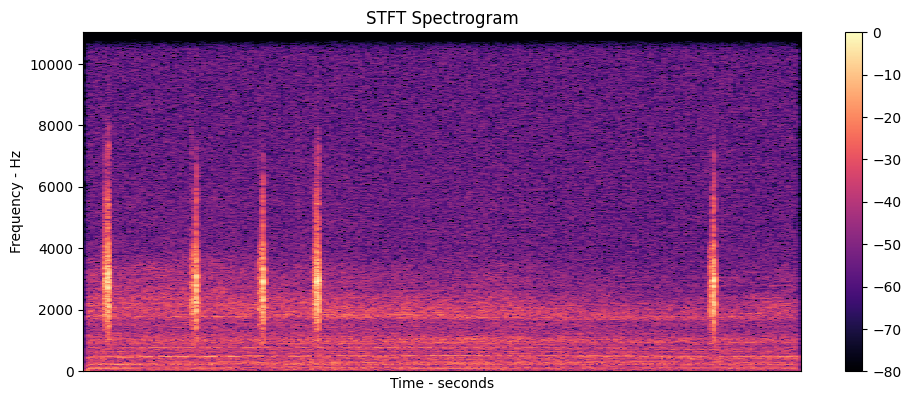

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# create a fft spectrogram for audio_file
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar()
plt.title('STFT Spectrogram')
plt.tight_layout()
plt.xlabel("Time - seconds")
plt.ylabel("Frequency - Hz")
plt.show()

In [ ]:
! pip install noisereduce

In [ ]:
import noisereduce as nr
reduced_noise = nr.reduce_noise(y=y, sr=sr)



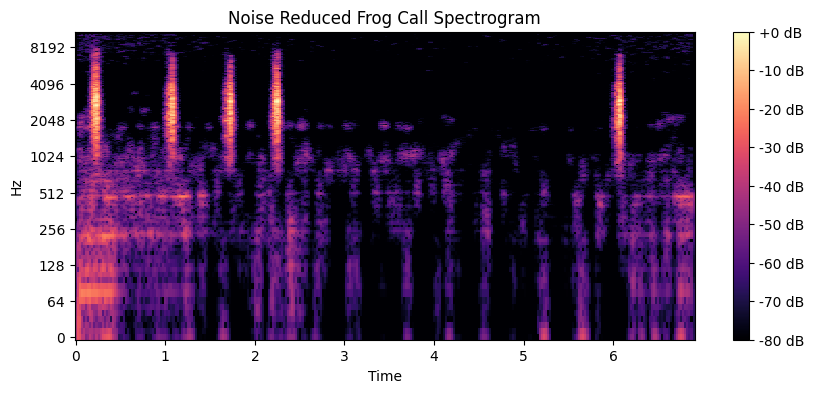

In [ ]:
# Plot the noise-reduced audio
plt.figure(figsize=(10, 4))
D_reduced = librosa.amplitude_to_db(np.abs(librosa.stft(reduced_noise)), ref=np.max)
librosa.display.specshow(D_reduced, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Noise Reduced Frog Call Spectrogram')
plt.show()

## Atteming to extract background noise so we can train model

In [ ]:
import os
import numpy as np
import librosa

# Function to extract background noise segments from an audio file
def extract_background_noise(audio_path, sample_rate=48000, noise_duration=3.0, threshold=0.02):
    # Load the audio file
    audio, sr = librosa.load(audio_path, sr=sample_rate)

    # Frame length and hop length for analyzing short segments
    frame_length = int(sample_rate * 0.1)  # Analyze in 100ms frames
    hop_length = int(frame_length / 2)  # 50% overlap

    # Calculate the root mean square (RMS) energy for each frame
    rms = librosa.feature.rms(y=audio, frame_length=frame_length, hop_length=hop_length)[0]

    # Find frames below the energy threshold
    low_energy_frames = np.where(rms < threshold)[0]

    # Extract audio samples corresponding to low-energy frames
    noise_segments = []
    for frame in low_energy_frames:
        start_sample = frame * hop_length
        end_sample = start_sample + frame_length
        noise_segment = audio[start_sample:end_sample]

        if len(noise_segment) >= sample_rate * noise_duration:
            noise_segments.append(noise_segment[:int(sample_rate * noise_duration)])

    return noise_segments



In [ ]:

# Directory containing your frog audio files
frog_audio_dir = '/path/to/frog/audio/files/'  # Change this path
background_noise_dir = '/path/to/save/background/noise/'  # Change this path

os.makedirs(background_noise_dir, exist_ok=True)

# Extract background noise from all frog audio files
for filename in os.listdir(frog_audio_dir):
    if filename.endswith(".wav"):  # Adjust for your file type
        file_path = os.path.join(frog_audio_dir, filename)
        noise_segments = extract_background_noise(file_path)

        for i, noise_segment in enumerate(noise_segments):
            # Save the noise segment
            noise_filename = f"{filename.split('.')[0]}_noise_{i}.wav"
            librosa.output.write_wav(os.path.join(background_noise_dir, noise_filename), noise_segment, sr=48000)